# Proyecto Individual Data Analytics: Accidentes aéreos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/Accidentes_final.csv')

## KPIs

###  Análisis de la Disminución en un 10% de la tasa anual de accidentes aéreos desde el año 2002 hasta el 2021.
(Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.)

Queremos centrar nuestro análisis en los últimos 20 años de los que poseemos información. Luego de los últimos avances tecnológicos, queremos conocer los años en que a nivel mundial se logro disminuir la tasa anual de accidentes por lo menos en un 10%

Creamos un dataframe que solo contenga los años que queremos analizar

In [3]:

df_kpi1 = df[df['year']>=2002]

Contamos los valores por año

In [6]:

anual_accidents_rate=df_kpi1['year'].value_counts().sort_index()
anual_accidents_rate

2002    55
2003    62
2004    46
2005    45
2006    38
2007    43
2008    51
2009    46
2010    40
2011    36
2012    26
2013    25
2014    23
2015    18
2016    23
2017    15
2018    19
2019    13
2020     8
2021     7
Name: year, dtype: int64

In [8]:
# Calculamos el cambio porcentual anual
annual_accidents_pct_change = anual_accidents_rate.pct_change()

In [9]:
# Resaltamos los años con una disminución del 10%
highlight = annual_accidents_pct_change < -0.09

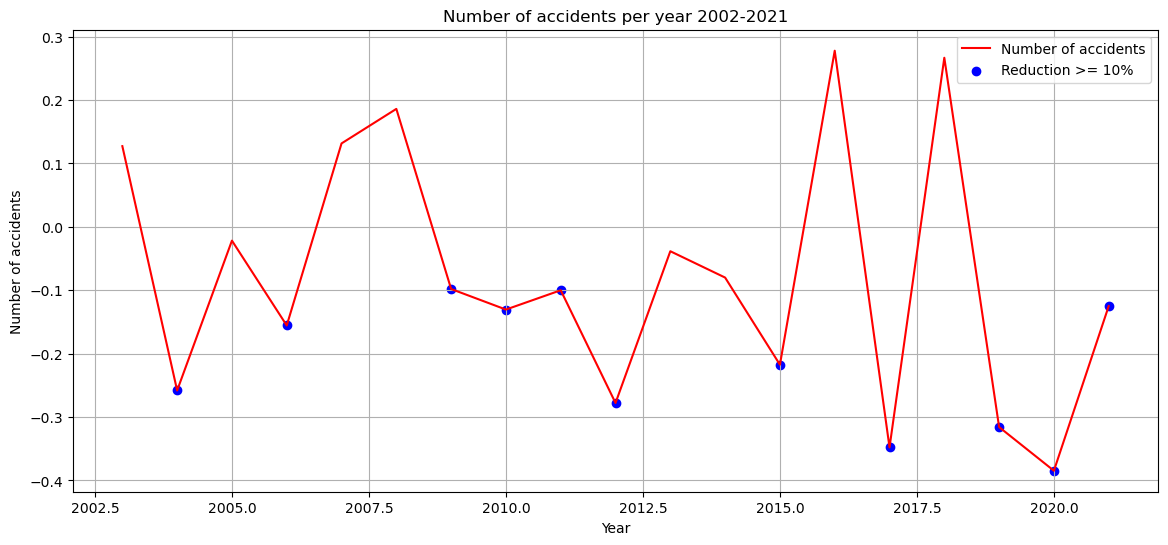

In [10]:
#Graficamos los accidentes del período resaltando los que tienen una disminución del 10% 
plt.figure(figsize=(14, 6))
plt.plot(annual_accidents_pct_change.index, annual_accidents_pct_change.values, label='Number of accidents', color='red')
plt.scatter(annual_accidents_pct_change[highlight].index, annual_accidents_pct_change[highlight].values, color='blue', label='Reduction >= 10%')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per year 2002-2021')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Contar el número de años en los que se cumplió el KPI
num_years_kpi = highlight.sum()
num_years_kpi

11

Podemos observar que de los 20 años que componen el intervalo, en 11 oportunidades se logró disminuir la tasa anual de accidentes en por lo menos un 10%, es decir, que al menos en un 50% de oportunidades se logró cumplir con el KPI.

###  Evaluar  un aumento de un 10% la tasa de supervivencia en los últimos 10 años, comparado a la década anterior.<br>

Se define la tasa de supervivencia como el número de sobrevivientes sobre el número de accidentes ocurridos en el período seleccionado. Creamos una funcion que nos de la tasa de supervivencia para la decada actual

In [12]:
#Creamos una función para hallar la tasa de supervivencia
def survivor_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_survivors= df_decade['survivors'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    survivors_rate = total_survivors / total_accidents


    return round(survivors_rate,2)

In [13]:
#Calculamos para el período deseado los intervalos y la tasa de supervivencia
decades_start_years = [2002,2012]
survivor_rates = [survivor_rate_per_decade(year) for year in decades_start_years]
decades_labels = [f"{year}-{year+9}" for year in decades_start_years]


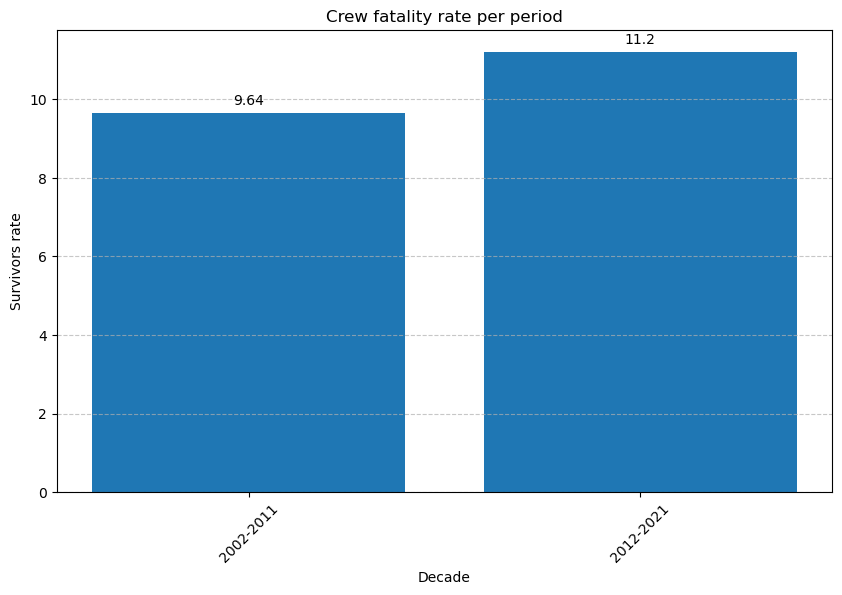

In [14]:

plt.figure(figsize=(10, 6))
plt.bar(decades_labels, survivor_rates)
plt.title('Crew fatality rate per period')
plt.xlabel('Decadas')
plt.ylabel('Survivors rate')
plt.xticks(rotation=45)
for i, valor in enumerate(survivor_rates):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='top')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos ver un claro aumento de la tasa de supervivencia a lo largo de la década evaluada.

In [15]:
def survivor_rate_per_decade(initial_year):

    #Para la decada actual
    df_decade = df[(df['year'] >= initial_year) & (df['year'] < (initial_year+10))]

    # Calcular la suma total de fallecidos de la tripulación en la década
    total_survivors= df_decade['survivors'].sum()

    # Calcular la suma total de accidentes en la década
    total_accidents = len(df_decade)

    # Calcular la Tasa de Fatalidad de la Tripulación en la década
    survivors_rate = total_survivors / total_accidents


    return "Total de sobrevivientes", total_survivors, "Total de accidentes", total_accidents, "Tasa de supervivencia", round(survivors_rate,2)

In [16]:
survivor_rate_per_decade(2002)

('Total de sobrevivientes',
 4453.0,
 'Total de accidentes',
 462,
 'Tasa de supervivencia',
 9.64)

In [17]:
survivor_rate_per_decade(2012)

('Total de sobrevivientes',
 1982.0,
 'Total de accidentes',
 177,
 'Tasa de supervivencia',
 11.2)

Podemos ver que la tasa de supervivencia logra aumenta de 9.64 a 11.2, un aumento de un 16%.